## CAPM模型

## classwork1-书上例题301

history(adjust=ADJUST_PREV, df= True,fill_missing="Last")

pd.merge

dropna


* 获取数据SHSE.000902与SHSE.600596的数据在2014-01-01到2014-12-31之间的数据

In [1]:
from gm.api import *
set_token("eea4b28a3ceb7048603d388bb777ebc67de47385")

In [2]:
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import numpy as np  
import pandas as pd

In [3]:
data_902 = history(symbol='SHSE.000902', frequency='1d', start_time='2014-01-01',  
                       end_time='2014-12-31', fields='close,eob', adjust=ADJUST_PREV, df= True,fill_missing="Last")

In [4]:
data_902

,close,eob
0,3028.7490,2014-01-02 00:00:00+08:00
1,3001.4619,2014-01-03 00:00:00+08:00
2,2927.4771,2014-01-06 00:00:00+08:00
3,2938.6021,2014-01-07 00:00:00+08:00
4,2950.7329,2014-01-08 00:00:00+08:00
...,...,...
240,4308.4941,2014-12-25 00:00:00+08:00
241,4396.2959,2014-12-26 00:00:00+08:00
242,4370.1890,2014-12-29 00:00:00+08:00
243,4334.9771,2014-12-30 00:00:00+08:00


In [4]:
data_596 = history(symbol='SHSE.600596', frequency='1d', start_time='2014-01-01',  
                       end_time='2014-12-31', fields='close,eob', adjust=ADJUST_PREV, df= True,fill_missing="Last")

In [5]:
data_596

,close,eob
0,6.6178,2014-01-02 00:00:00+08:00
1,6.5514,2014-01-03 00:00:00+08:00
2,6.0986,2014-01-06 00:00:00+08:00
3,6.1046,2014-01-07 00:00:00+08:00
4,6.0744,2014-01-08 00:00:00+08:00
...,...,...
239,6.6437,2014-12-25 00:00:00+08:00
240,6.6684,2014-12-26 00:00:00+08:00
241,6.4829,2014-12-29 00:00:00+08:00
242,6.3839,2014-12-30 00:00:00+08:00


* 由于数据缺失，通过pd.merge基于eob连接数据，并计算对应的Ri Rm Rf，然后做出Rm-Rf 与Ri-Rf的散点图

In [7]:
data0=pd.merge(data_596,data_902,on="eob")
data0

,close_x,eob,close_y
0,6.6178,2014-01-02 00:00:00+08:00,3028.7490
1,6.5514,2014-01-03 00:00:00+08:00,3001.4619
2,6.0986,2014-01-06 00:00:00+08:00,2927.4771
3,6.1046,2014-01-07 00:00:00+08:00,2938.6021
4,6.0744,2014-01-08 00:00:00+08:00,2950.7329
...,...,...,...
239,6.6437,2014-12-25 00:00:00+08:00,4308.4941
240,6.6684,2014-12-26 00:00:00+08:00,4396.2959
241,6.4829,2014-12-29 00:00:00+08:00,4370.1890
242,6.3839,2014-12-30 00:00:00+08:00,4334.9771


In [8]:
Rq=(data0.close_x/data0.shift(1).close_x-1).dropna()
Rm=(data0.close_y/data0.shift(1).close_y-1).dropna()

In [9]:
Rf=(1+0.036)**(1/360)-1
Rf

9.824689212445392e-05

In [23]:
Rq-Rf=a+b(Rm-Rf)

SyntaxError: can't assign to operator (<ipython-input-23-f5063a0113ef>, line 1)

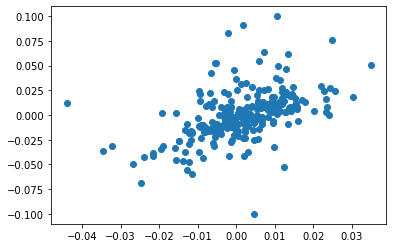

In [10]:
plt.plot(Rm-Rf,Rq-Rf,"o")

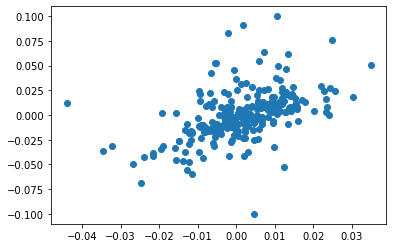

* 通过sm.OLS函数进行线性拟合，并画出拟合结果

In [11]:
model = sm.OLS((Rq-Rf), sm.add_constant(Rm-Rf))
result = model.fit()

C:\Users\wp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                close_x   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     77.02
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           3.16e-16
Time:                        21:21:30   Log-Likelihood:                 580.35
No. Observations:                 243   AIC:                            -1157.
Df Residuals:                     241   BIC:                            -1150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.001     -1.102      0.272      -0.004       0.001
close_y        1.1238      0.128      8.776      0.000       0.872       1.376
==============================================================================
Omnibus:                       49.522   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.212
Skew:                           0.695   Prob(JB):                     3.77e-51
Kurtosis:                       7.583   Cond. No.                         89.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
Rq1=[8.0,9.4,7.3]
Rm1=[2.5,3.4,4.5]

In [46]:
Rq1=pd.Series(Rq1)
Rm1=pd.Series(Rm1)

In [38]:
Rq1.var()

1.143333333333334

In [44]:
Rq1.values

array([8. , 9.4, 7.3])

In [53]:
0.09-0.06*1.2

0.018000000000000002

In [54]:
0.12-0.06*1.3

0.041999999999999996

In [47]:
Rqm=pd.DataFrame({"a":Rq1.values,"b":Rm1.values})

In [49]:
Rqm.cov()

,a,b
a,1.1433,-0.4083
b,-0.4083,1.0033


In [50]:
-0.4083/1.143333333333334

-0.3571137026239065

In [21]:
result.params

const     -0.0016
close_y    1.1238
dtype: float64

In [34]:
4/5

0.8

In [35]:
3/4

0.75

In [14]:
x=np.arange(-0.04,0.035,0.005)
y=-0.0016+1.1238*x

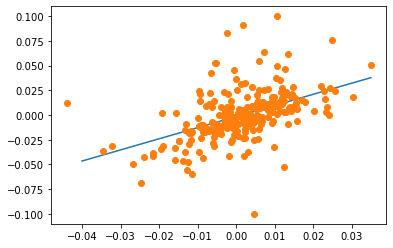

In [15]:
plt.plot(x,y)
plt.plot(Rm-Rf,Rq-Rf,"o")

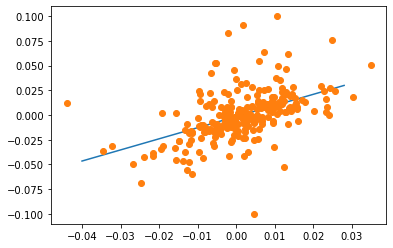

## classwork 2

书本 306页题目

## classwork3

计算SHSE.000300中的股票的alpha与beta值，并选择其中alpha值为前10个股票，看是否接下来一年的平均收益高于SHSE.000300

get_history_constituents

In [37]:
stock300 = get_history_constituents(index='SHSE.000300',start_date='2014-01-01',end_date='2014-12-31')[0]['constituents'].keys()

In [38]:
stock_s=""
n=0
for i in stock300:
    n=n+1
    stock_s=stock_s+i+","
    #print(i)
    #if n==4:break

In [39]:
stock_s

'SZSE.000001,SZSE.000002,SZSE.000012,SZSE.000009,SZSE.000024,SZSE.000039,SZSE.000100,SZSE.000046,SZSE.000060,SZSE.000061,SZSE.000063,SHSE.600000,SZSE.000069,SHSE.600010,SHSE.600011,SHSE.600008,SHSE.600009,SHSE.600015,SHSE.600016,SHSE.600018,SHSE.600019,SHSE.600030,SHSE.600031,SHSE.600027,SHSE.600028,SHSE.600029,SZSE.000156,SHSE.600036,SZSE.000157,SHSE.600100,SHSE.600050,SHSE.600048,SHSE.600104,SHSE.600060,SHSE.600111,SHSE.600062,SHSE.600108,SHSE.600058,SHSE.600109,SHSE.600115,SHSE.600066,SHSE.600068,SHSE.600123,SHSE.600118,SHSE.600079,SHSE.600085,SHSE.600143,SHSE.600089,SHSE.600150,SHSE.600096,SHSE.600153,SHSE.600160,SHSE.600157,SZSE.000333,SHSE.600208,SHSE.600170,SHSE.600216,SHSE.600221,SHSE.600166,SZSE.000338,SZSE.000400,SHSE.600219,SZSE.000401,SZSE.000402,SHSE.600177,SHSE.600188,SHSE.600196,SZSE.000423,SHSE.600252,SZSE.000425,SHSE.600256,SHSE.600309,SHSE.600259,SHSE.600315,SHSE.600271,SHSE.600266,SHSE.600316,SHSE.600267,SHSE.600276,SHSE.600332,SHSE.600340,SHSE.600352,SHSE.600348,SHS

In [28]:
stock_s=""
n=0
for i in stock300:
    n=n+1
    stock_s=stock_s+i+","
    if n==4:break

In [87]:
stock_s

'SZSE.000063,SHSE.600000,SZSE.000069,SHSE.600010,'

In [29]:
history(symbol="SHSE.601990", frequency='1d', start_time='2014-01-01',  
                       end_time='2014-12-31', fields='close,eob,symbol', adjust=ADJUST_PREV, df= True,fill_missing="Last")

""


In [40]:
data_300 = history(symbol=stock_s, frequency='1d', start_time='2014-01-01',  
                       end_time='2014-12-31', fields='close,eob,symbol', adjust=ADJUST_PREV, df= True,fill_missing="Last")

In [41]:
data_300

,close,eob,symbol
0,12.9425,2014-01-02 00:00:00+08:00,SHSE.601607
1,6.8117,2014-01-02 00:00:00+08:00,SHSE.600583
2,2.6563,2014-01-02 00:00:00+08:00,SHSE.600115
3,7.3521,2014-01-02 00:00:00+08:00,SHSE.600649
4,5.3493,2014-01-02 00:00:00+08:00,SHSE.601369
...,...,...,...
32995,14.9777,2014-12-31 00:00:00+08:00,SZSE.000783
32996,13.4837,2014-12-31 00:00:00+08:00,SZSE.000963
32997,5.6924,2014-12-31 00:00:00+08:00,SZSE.000338
32998,8.8080,2014-12-31 00:00:00+08:00,SZSE.000046


In [32]:
Rm

1     -0.0090
2     -0.0246
3      0.0038
4      0.0041
5     -0.0115
        ...  
239    0.0243
240    0.0204
241   -0.0059
242   -0.0081
243    0.0158
Name: close_y, Length: 243, dtype: float64

In [35]:
data_300

,close,eob,symbol
0,4.4014,2014-01-02 00:00:00+08:00,SHSE.600018
1,5.8542,2014-01-02 00:00:00+08:00,SHSE.600031
2,11.0561,2014-01-02 00:00:00+08:00,SHSE.600030
3,3.0748,2014-01-02 00:00:00+08:00,SHSE.600019
4,4.2927,2014-01-03 00:00:00+08:00,SHSE.600018
...,...,...,...
929,5.3335,2014-12-30 00:00:00+08:00,SHSE.600019
930,5.5243,2014-12-31 00:00:00+08:00,SHSE.600018
931,9.3496,2014-12-31 00:00:00+08:00,SHSE.600031
932,30.1127,2014-12-31 00:00:00+08:00,SHSE.600030


In [43]:
data_300[data_300["symbol"]=="SHSE.600583"]

,close,eob,symbol
1,6.8117,2014-01-02 00:00:00+08:00,SHSE.600583
296,6.6593,2014-01-03 00:00:00+08:00,SHSE.600583
592,6.4442,2014-01-06 00:00:00+08:00,SHSE.600583
889,6.4352,2014-01-07 00:00:00+08:00,SHSE.600583
1186,6.4890,2014-01-08 00:00:00+08:00,SHSE.600583
1482,7.1343,2014-01-09 00:00:00+08:00,SHSE.600583
1779,7.2957,2014-01-10 00:00:00+08:00,SHSE.600583
2077,7.1792,2014-01-13 00:00:00+08:00,SHSE.600583
2375,7.4839,2014-01-14 00:00:00+08:00,SHSE.600583
2673,7.4749,2014-01-15 00:00:00+08:00,SHSE.600583


In [36]:
data_300[data_300["symbol"]=="SHSE.603019"]

,close,eob,symbol


In [34]:
data_300[data_300["symbol"]=="SHSE.601600"]

,close,eob,symbol


In [8]:
data0=pd.merge(data_596,data_902,on="eob")
data0

,close_x,eob,close_y
0,9.6134,2014-01-02 00:00:00+08:00,3028.7490
1,9.5170,2014-01-03 00:00:00+08:00,3001.4619
2,8.8591,2014-01-06 00:00:00+08:00,2927.4771
3,8.8679,2014-01-07 00:00:00+08:00,2938.6021
4,8.8240,2014-01-08 00:00:00+08:00,2950.7329
...,...,...,...
239,9.6510,2014-12-25 00:00:00+08:00,4308.4941
240,9.6870,2014-12-26 00:00:00+08:00,4396.2959
241,9.4174,2014-12-29 00:00:00+08:00,4370.1890
242,9.2736,2014-12-30 00:00:00+08:00,4334.9771


In [9]:
def dj(data_596):
    data0=pd.merge(data_596,data_902,on="eob")
    Rq=(data0.close_x/data0.shift(1).close_x-1).dropna()
    Rm=(data0.close_y/data0.shift(1).close_y-1).dropna()
    model = sm.OLS((Rq-Rf), sm.add_constant(Rm-Rf))
    result = model.fit()
    return result.params

In [45]:
dj(data_300[data_300["symbol"]=="SHSE.600583"])

const      0.0009
close_y    0.7660
dtype: float64

In [52]:
s=[]
const1=[]
close_y=[]
n=0
for i in stock300:
    n=n+1
    try:
        z1=dj(data_300[data_300["symbol"]==i])
        #print(z1,i)
        s.append(i)
        const1.append(z1.const)
        close_y.append(z1.close_y)
    except:
        continue
    #if n==4:break

In [53]:
r1=pd.DataFrame({"symbol":s,"const":const1,"close_y":close_y})

In [61]:
r1

,symbol,const,close_y
0,SZSE.000001,0.0003,1.0967
1,SZSE.000002,0.0012,0.9856
2,SZSE.000012,-0.0011,1.0901
3,SZSE.000009,0.0010,1.0118
4,SZSE.000024,0.0011,1.3822
...,...,...,...
295,SHSE.601992,-0.0047,1.4735
296,SHSE.601988,-0.0012,0.2747
297,SHSE.601989,-0.0020,1.4499
298,SZSE.002673,0.0024,1.5581


In [60]:
r1.sort_values(by="const",ascending=False).head(10).symbol.values

array(['SZSE.000562', 'SHSE.600588', 'SHSE.600109', 'SHSE.600688',
       'SHSE.601099', 'SHSE.601098', 'SHSE.600582', 'SHSE.601998',
       'SHSE.600519', 'SHSE.600893'], dtype=object)

In [47]:
data_300[data_300["symbol"]=="SHSE.601990"]

,close,eob,symbol


In [77]:
dj(data_300[data_300["symbol"]=="SHSE.601990"])

ValueError: zero-size array to reduction operation maximum which has no identity

In [17]:
stock300 = get_history_constituents(index='SHSE.000300',start_date='2014-01-01',end_date='2014-12-31')[0]['constituents'].keys()
stock_s=""
n=0
for i in stock300:
    n=n+1
    stock_s=stock_s+i+","
    
data_300 = history(symbol=stock_s, frequency='1d', start_time='2014-01-01',  
                       end_time='2014-12-31', fields='close,eob,symbol', adjust=ADJUST_PREV, df= True,fill_missing="Last")

def dj(data_596):
    data0=pd.merge(data_596,data_902,on="eob")
    Rq=(data0.close_x/data0.shift(1).close_x-1).dropna()
    Rm=(data0.close_y/data0.shift(1).close_y-1).dropna()
    model = sm.OLS((Rq-Rf), sm.add_constant(Rm-Rf))
    result = model.fit()
    return result.params

s=[]
const1=[]
close_y=[]
n=0
for i in stock300:
    n=n+1
    try:
        z1=dj(data_300[data_300["symbol"]==i])
        #print(z1,i)
        s.append(i)
        const1.append(z1.const)
        close_y.append(z1.close_y)
    except:
        continue
        

r1=pd.DataFrame({"symbol":s,"const":const1,"close_y":close_y})

r1.sort_values(by="const",ascending=False).head(10).symbol.values

array(['SZSE.000562', 'SHSE.600588', 'SHSE.600109', 'SHSE.600688',
       'SHSE.601099', 'SHSE.600582', 'SHSE.601998', 'SHSE.601098',
       'SHSE.600519', 'SHSE.600893'], dtype=object)